In [1]:
import numpy as np
import pandas as pd # just for data organization
import matplotlib.pyplot as plt 

from scipy.stats import norm # for exemplitication
from scipy.special import gamma # for accumulated damage alculation

# for interactive plots
%matplotlib notebook

# Structural reliability

University of Liège.

Facilitators: Felipe Giro, Jose Mishael , Pablo Morato.

## Scope (to be excluded)
- 10 min for Monte carlo integration explantion
- 10 min for damage calculation explanation
- 20 linutes for exercise.
- 5 minutes for answer.

# Monte Carlo integration
More information : https://en.wikipedia.org/wiki/Monte_Carlo_integration

Monte Carlo integration is a numerical technique to compute integrals by using random variables.

**Objective:** Compute the probability of a random variable $X$ goes above a given threshold.  Then compare with the analytical solution.

In [2]:
# gaussian parameters
mean, std = 4, 1.2

# Integrate from all value above the threshold
threshold = 5

In [3]:
# analytical solution
Analytical_sol = norm(mean, std).sf(threshold)

print("The analytical solution is {:.4f}".format(Analytical_sol))

The analytical solution is 0.2023


In [4]:
# Monte Carlo integration

number_samples = int(1e6)

# samples generation
samples = np.random.normal(mean, std, size=number_samples)

# counting all samples that is above the threshold
n_samples_in = (samples > threshold).sum()

MonteCarlo_solution = n_samples_in/number_samples

print("The Monte Carlo solution is {:.4f}".format(MonteCarlo_solution))

The Monte Carlo solution is 0.2019


<IPython.core.display.Javascript object>


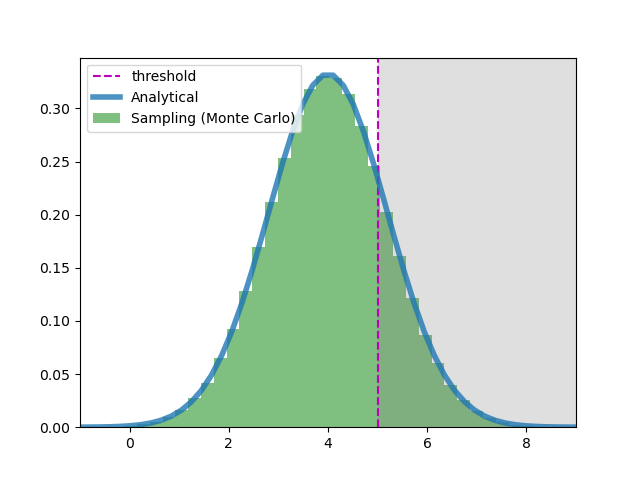

In [5]:
# just for plotting
x_axis = np.linspace(-1, 9)
fig, ax = plt.subplots()
ax.axvline(threshold, color="m", label="threshold", ls="--")
ax.plot(x_axis, norm(mean, std).pdf(x_axis), lw=4, alpha=.8, label='Analytical')
ax.hist(samples, bins=50, density=True, color="green", alpha=.5, label="Sampling (Monte Carlo)")
ax.legend()
ax.axvspan(threshold, 9, color="grey", alpha=.25)
ax.set_xlim((-1, 9))
plt.show()

# Why use Monte Carlo integration?

Some distributions are impossible to describe analyticaly, e.g., a normal distribution represented in terms of mean and variance. For these cases, Monte carlo integration is useful.

Let's consider the previous example, the initially normal distribution pass through a non-linear function, let's say, $f(x)=1/3*x^{2}$.

In [6]:
f = lambda x : 1/3*x**2

samples1 = f(samples)

In [7]:
# Calculate the pf with the given threshold
pf_x0 = MonteCarlo_solution # already computed
pf_x1 = (samples1 > threshold).sum()/number_samples

<IPython.core.display.Javascript object>


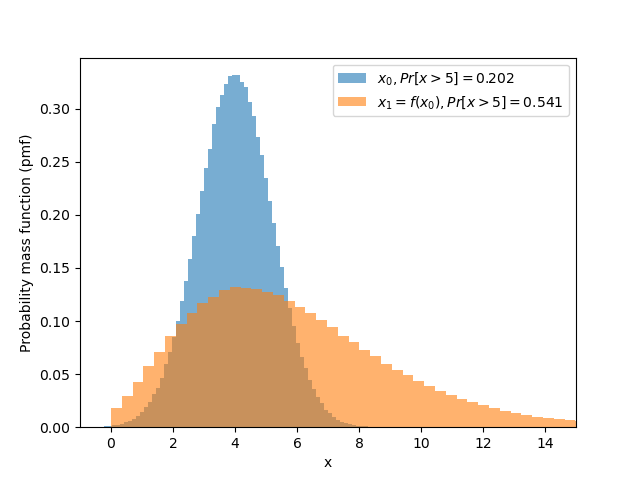

In [8]:
# just for plotting
fig, ax = plt.subplots()

ax.hist(samples , bins=100, alpha=.6, density=True, label="$x_0, Pr[x>{}]={:.3f}$".format(threshold, pf_x0))
ax.hist(samples1, bins=100, alpha=.6, density=True, label="$x_1=f(x_0), Pr[x>{}]={:.3f}$".format(threshold, pf_x1))
ax.legend()
ax.set_xlim((-1,15))
ax.set_xlabel('x')
ax.set_ylabel('Probability mass function (pmf)')
plt.show()

# Damage Accumulation - Exercise

Compute the probability of failure of a element through Miner's rule.

#### Damage calculation 
(Equation 5.1.3, DNVGL-RP-C203)

$D=\frac{v_0 T_d}{a}q^m\Gamma(1+\frac{m}{h})$    

#### Limit state function

$g = \Delta - D > 0$

#### Random variables

| Variable | Distribution | Description |
| --- | --- | --- |
| $a$ | lognormal | intercept of the design S-N curve with the log N axis |
| $q$ | normal | Weibull stress range scale distribution parameter |
| $\Delta$ |lognormal | inital damage state |

In [9]:
# number of samples
n_samples = int(1e6)

# parameters (constant)
v0 = 5049216
m = 3 # negative inverse slope of the S-N curve
h = 0.8 # shape parameters for the Weibull stress range

# parameters (random variables)
loga = 11.687
loga_std = 0.2
loga_mean = loga + 2*loga_std
q_mean = 4.59
q_std = 0.25*q_mean
Delta_mean = 0 # in numpy, it use the corresponding normal parameters
Delta_std = (np.log(0.3**2+1))**0.5 # in numpy, it uses the corresponding normal parameters

# random variables
loga = np.random.normal(loga_mean, loga_std, n_samples) # hidden for exercise
Delta = np.random.lognormal(Delta_mean, Delta_std, n_samples) # hidden for exercise
q = np.random.normal(q_mean, q_std, n_samples) # hidden for exercise

<IPython.core.display.Javascript object>


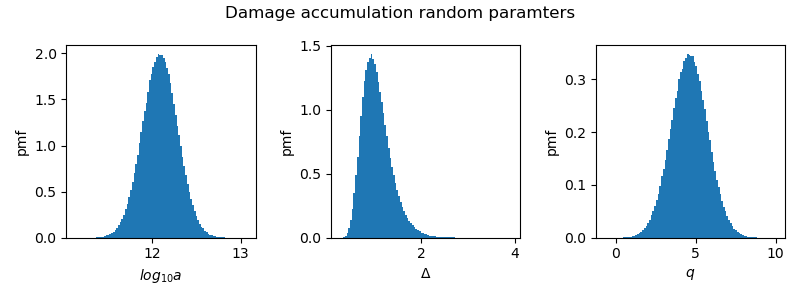

In [10]:
# just for ploting.
fig, axes = plt.subplots(ncols=3, figsize=(8,3))

fig.suptitle("Damage accumulation random paramters")

axes[0].hist(loga, bins=100, density=True)
axes[0].set_xlabel("$log_{10}a$")
axes[0].set_ylabel("pmf")

axes[1].hist(Delta, bins=100, density=True)
axes[1].set_xlabel("$\Delta$")
axes[1].set_ylabel("pmf")

axes[2].hist(q, bins=100, density=True)
axes[2].set_xlabel("$q$")
axes[2].set_ylabel("pmf")

plt.tight_layout()
plt.show()

In [11]:
# damage propagation after 20 years
Td = 20

# Deterioration equation
D = lambda Td : v0*Td/a*q**m*gamma(1+m/h) # hidden for exercise

a = 10**loga
g = Delta - D(Td) # hidden for exercise
pf = (g < 0).sum()/n_samples # hidden for exercise

print("Probability of failure:", pf)

Probability of failure: 0.006829


<IPython.core.display.Javascript object>


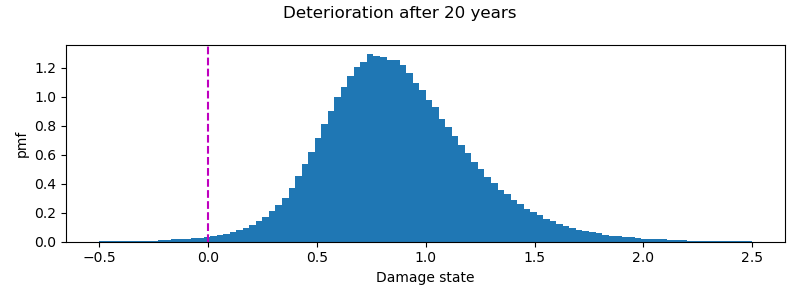

In [12]:
# just for plotting
fig, ax = plt.subplots(figsize=(8,3))

fig.suptitle("Deterioration after {} years".format(Td))

ax.hist(g, density=True, bins=100, range=(-0.5, 2.5))
ax.set_xlabel("Damage state")
ax.set_ylabel("pmf")
ax.axvline(0, color='m', ls="--")

plt.tight_layout()
plt.show()

## Deterioration state evolution

In [13]:
# Initial deteiroration state
g_0  = Delta - D(0) # hidden for exercise
pf_0 = (g_0 < 0).sum()/n_samples # hidden for exercise

# Deterioration state after 10 years
g_10 = Delta - D(10) # hidden for exercise
pf_10 = (g_10 < 0).sum()/n_samples # hidden for exercise

# Deterioration state after 20 years
g_20 = Delta - D(20) # hidden for exercise
pf_20 = (g_20 < 0).sum()/n_samples # hidden for exercise

<IPython.core.display.Javascript object>


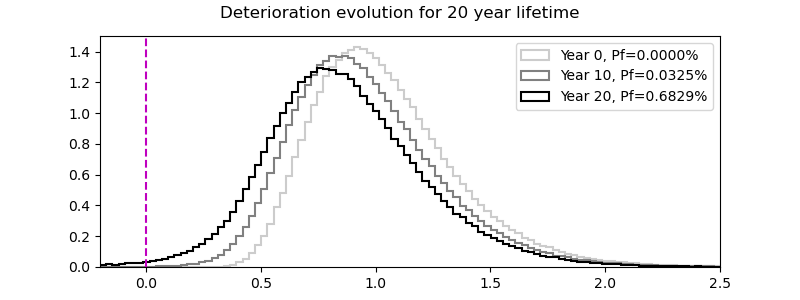

In [14]:
# just for plotting
fig, ax = plt.subplots(figsize=(8,3))

fig.suptitle("Deterioration evolution for {} year lifetime".format(Td))

ax.set_xlim((-0.2, 2.5))

ax.hist(g_0, bins=100, density=True, histtype='step', color = '0.8', label="Year 0, Pf={:.4f}%".format(pf_0*100), lw=1.5, range=(-0.2, 2.5))
ax.hist(g_10, bins=100, density=True, histtype='step', color = '0.5', label="Year 10, Pf={:.4f}%".format(pf_10*100), lw=1.5, range=(-0.2, 2.5))
ax.hist(g_20, bins=100, density=True, histtype='step', color = 'k', label="Year 20, Pf={}%".format(pf_20*100), lw=1.5, range=(-0.2, 2.5))
ax.axvline(0, color='m', ls="--")

ax.set_xlabel("")
ax.legend()

plt.show()

## Change on parameters uncertainties

Try to change the random parameters uncertainties (represented by the standard deviation). What is the influence of parameters uncertainties on the probability of failure ($p_f$)? Does reducing the uncertainties reduces the probability of failure? Is it always the case?

<IPython.core.display.Javascript object>


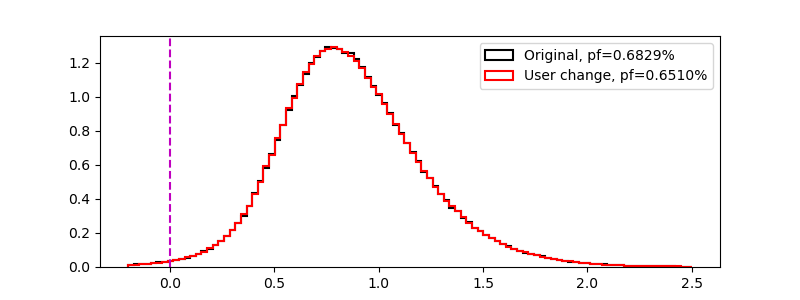

In [16]:
# parameters (random variables)
loga_std = 0.2
loga_mean = loga + 2*loga_std
q_mean = 4.59
q_std = 0.25*q_mean
Delta_mean = 0 # in numpy, it use the corresponding normal parameters
Delta_std = (np.log(0.3**2+1))**0.5 # in numpy, it uses the corresponding normal parameters

# random variables
loga = np.random.normal(loga_mean, loga_std, n_samples) # hidden for exercise
Delta = np.random.lognormal(Delta_mean, Delta_std, n_samples) # hidden for exercise
q = np.random.normal(q_mean, q_std, n_samples) # hidden for exercise

g_user = Delta - D(20) # hidden for exercise
pf_user = (g_user < 0).sum()/n_samples # hidden for exercise

# just for plotting
fig, ax = plt.subplots(figsize=(8,3))
ax.hist(g_20, bins=100, density=True, histtype='step', color = 'k', label="Original, pf={:.4f}%".format(pf_20*100), ls="-", lw=1.5, range=(-0.2, 2.5))
ax.hist(g_user, bins=100, density=True, histtype='step', color = 'red', label="User change, pf={:.4f}%".format(pf_user*100), ls="-", lw=1.5, range=(-0.2, 2.5))
ax.legend()
ax.axvline(0, color='m', ls="--")
plt.show()

# Discussion
- Why the values of $p_f$ are different?